In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from IPython.display import Markdown, display
from collections import Counter, defaultdict
import re
import zipfile
plt.rcParams['figure.figsize'] = (12, 6)

### Downloading Data

In [ ]:
url = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2019.zip"
response = requests.get(url)
response.status_code
with open("data.zip", "wb") as file:
    file.write(response.content)
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("Stack Overflow 2019")

In [ ]:
def percentage(value, total, ro=2):
    return round((value/total)*100, ro)

def parseStringToInt(value):
    try:
        value = int(re.search(r"\d+", value).group())
    except Exception:
        value = 0
    return value

def hCountPlot(data, total=False, title="", xlabel="", ylabel="", showValue=False, roundValue=2):
    plt.title(title)
    xticks = []
    ydata  = []
    for xtick, yvalue in data:
        if total:
            xtick += f" ({percentage(yvalue, total)}%)"
        elif showValue:
            xtick += f" ({round(yvalue, roundValue)})"
        xticks.append(xtick)
        ydata.append(yvalue)
    ax = plt.barh(xticks, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def countPlot(data, total=False, title="", xlabel="", ylabel="", showValue=False):
    plt.title(title)
    xticks = []
    ydata  = []
    for xtick, yvalue in data:
        if total:
            xtick += f" ({percentage(yvalue, total)}%)"
        elif showValue:
            xtick += f" ({round(yvalue, roundValue)})"
        xticks.append(xtick)
        ydata.append(yvalue)
    ax = plt.bar(xticks, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Reading Data as DataFrame

In [ ]:
data = pd.read_csv("Stack Overflow 2019/survey_results_public.csv")
totalEntries = data.shape[0]

In [ ]:
data.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


### Converting Column

In [ ]:
tdata = data.Gender.value_counts()
totalGender = tdata.sum()
totalMen   = tdata["Man"]
totalWomen = tdata["Woman"]
totalOtherGender = tdata[2:].sum()
totalUnknownGender  = totalEntries - totalGender

genderData  = sorted(list(zip(
    ["Men", "Women", "Other", "Unknown"],
    [totalMen, totalWomen, totalOtherGender, totalUnknownGender],
)), key=lambda kv: kv[1])

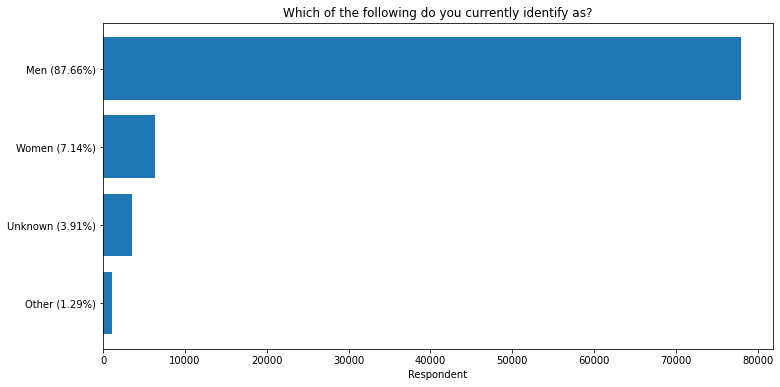

In [ ]:
hCountPlot(genderData, total=totalEntries, title="Which of the following do you currently identify as?", xlabel="Respondent")

In [ ]:
devTypeCounter = Counter()
for value in data.DevType.dropna():
    devTypeCounter.update(value.split(";"))

devTypeData = sorted(devTypeCounter.items(), key=lambda kv: kv[1])

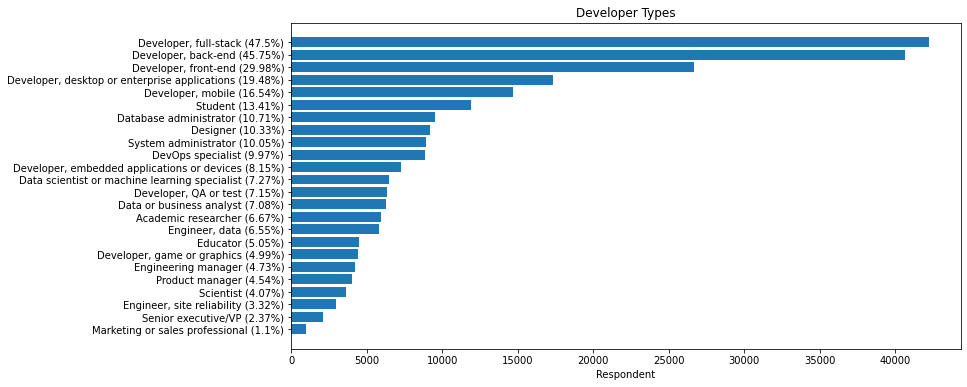

In [ ]:
hCountPlot(devTypeData, total=totalEntries, title="Developer Types", xlabel="Respondent")

In [ ]:
tdata = data.OpenSourcer.value_counts().sort_values()
openSourcerData = list(zip(tdata.index, tdata.values))

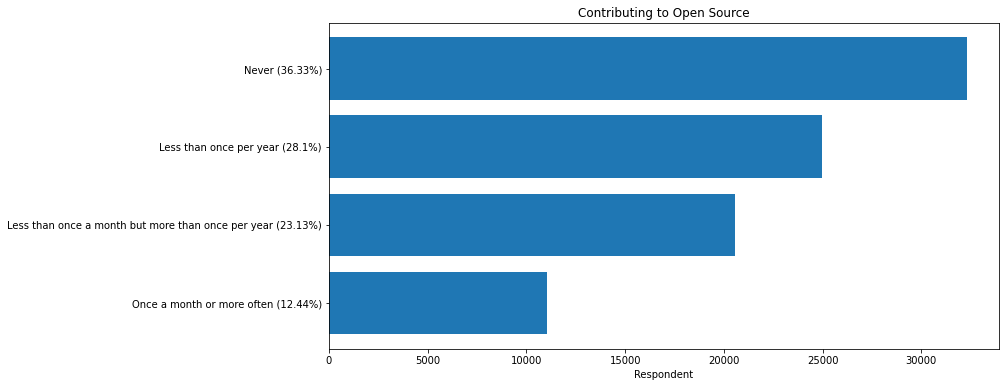

In [ ]:
hCountPlot(openSourcerData, total=totalEntries, title="Contributing to Open Source", xlabel="Respondent")

In [ ]:
hobbyiestCounter = Counter()
for value in data.Hobbyist.dropna():
    hobbyiestCounter.update(value.split(";"))

hobbyiestData = sorted(hobbyiestCounter.items(), key=lambda kv: kv[1])

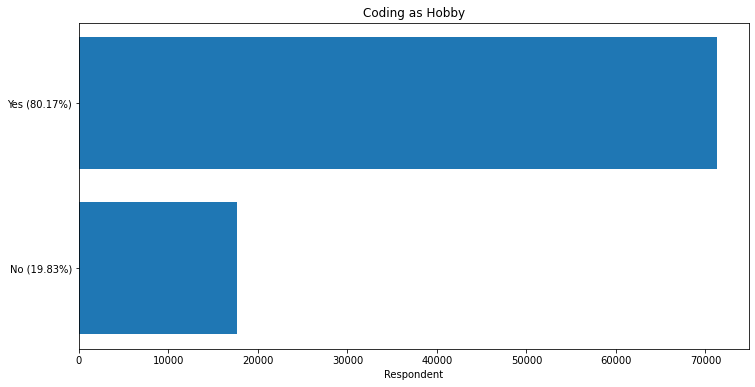

In [ ]:
hCountPlot(hobbyiestData, total=totalEntries, title="Coding as Hobby", xlabel="Respondent")

In [ ]:
tdata = data[data.Country == "India"]
totalIndians = tdata.Gender.count()

tdata = tdata.Gender.value_counts()

totalGender = tdata.sum()
totalMen   = tdata["Man"]
totalWomen = tdata["Woman"]
totalOtherGender = tdata[2:].sum()
totalUnknownGender  = totalIndians - totalGender

indiaGenderData  = sorted(list(zip(
    ["Men", "Women", "Other", "Unknown"],
    [totalMen, totalWomen, totalOtherGender, totalUnknownGender],
)), key=lambda kv: kv[1])

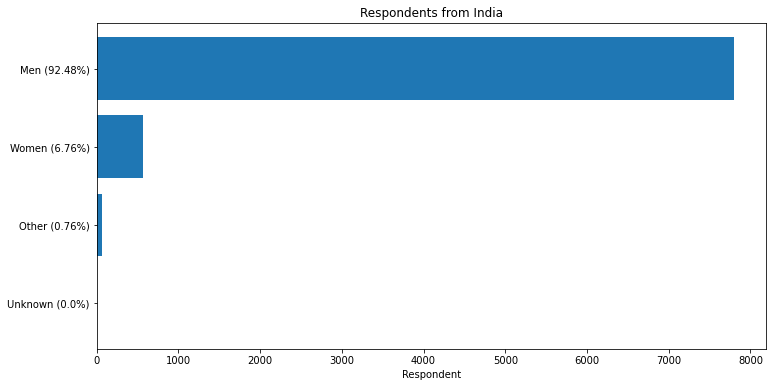

In [ ]:
hCountPlot(indiaGenderData, total=totalIndians, title="Respondents from India", xlabel="Respondent")

In [ ]:
counter = Counter()
def yearsCalcBins(value):
    try:
        value = int(re.search(r"\d+", value).group())
        if value < 6:
            counter["Less than 5 years"] += 1
        elif value < 10:
            counter["5 to 9 years"] += 1
        elif value < 15:
            counter["10 to 14 years"] += 1
        elif value < 20:
            counter["15 to 19 years"] += 1
        elif value < 25:
            counter["20 to 24 years"] += 1
        elif value < 30:
            counter["25 to 29 years"] += 1
        elif value < 35:
            counter["30 to 34 years"] += 1
        elif value < 40:
            counter["35 to 39 years"] += 1
        elif value < 45:
            counter["40 to 44 years"] += 1
        elif value < 50:
            counter["45 to 49 years"] += 1
        else:
            counter["50 years or more"] += 1
    except TypeError as error:
        counter["unknown"] += 1
    return value
data.YearsCode.apply(yearsCalcBins)
print(counter)

Counter({'Less than 5 years': 25110, '5 to 9 years': 20220, '10 to 14 years': 16734, '15 to 19 years': 9802, '20 to 24 years': 6805, '25 to 29 years': 3173, '30 to 34 years': 2834, '35 to 39 years': 2012, 'unknown': 945, '40 to 44 years': 839, '45 to 49 years': 232, '50 years or more': 177})


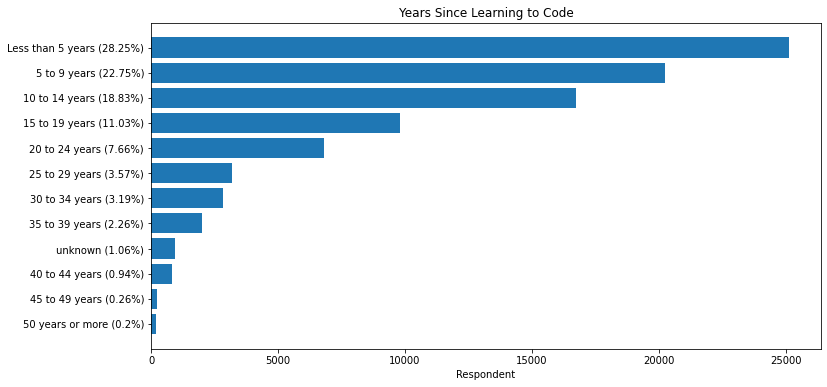

In [ ]:
yearsCodeData = sorted(list(zip(counter.keys(), counter.values())), key=lambda kv: kv[1])
hCountPlot(yearsCodeData, total=totalEntries, title="Years Since Learning to Code", xlabel="Respondent")

In [ ]:
counter = Counter()
data.YearsCodePro.apply(yearsCalcBins)
print(counter)

Counter({'Less than 5 years': 36920, 'unknown': 14552, '5 to 9 years': 13608, '10 to 14 years': 10780, '15 to 19 years': 5483, '20 to 24 years': 4097, '25 to 29 years': 1486, '30 to 34 years': 1088, '35 to 39 years': 526, '40 to 44 years': 225, '50 years or more': 62, '45 to 49 years': 56})


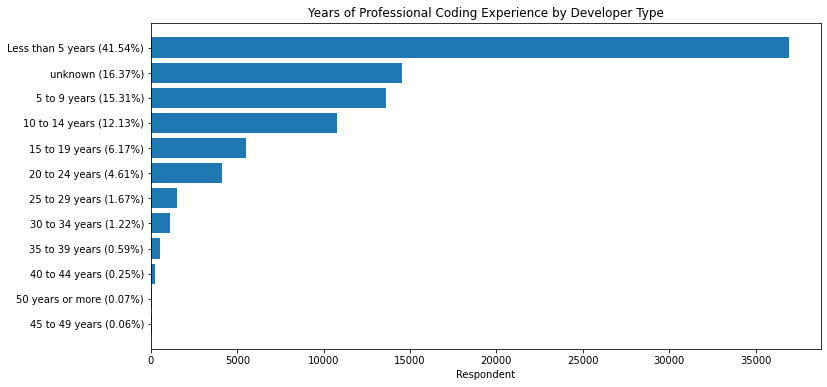

In [ ]:
yearsCodeProData = sorted(list(zip(counter.keys(), counter.values())), key=lambda kv: kv[1])
hCountPlot(yearsCodeProData, total=totalEntries, title="Years of Professional Coding Experience by Developer Type", xlabel="Respondent")

In [ ]:
dfdict = defaultdict()
for year, string in zip(data.YearsCodePro, data.DevType):
    try:
        for value in string.split(";"):
            if value in dfdict:
                dfdict[value] += parseStringToInt(year)
            else:
                dfdict[value] = 0
    except Exception:
        pass
yearsProCodeExpByDevTypeMean = []
for key, value in dfdict.items():
    temp = [key, round(value / devTypeCounter[key], 2)]
    yearsProCodeExpByDevTypeMean.append(temp)

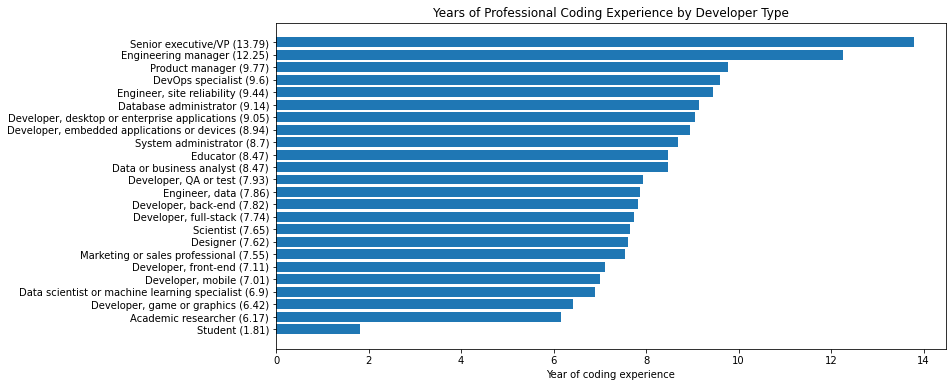

In [ ]:
yearsProCodeExpByDevTypeMean = sorted(yearsProCodeExpByDevTypeMean, key=lambda kv: kv[1])
hCountPlot(yearsProCodeExpByDevTypeMean, showValue=True, title="Years of Professional Coding Experience by Developer Type", xlabel="Year of coding experience")

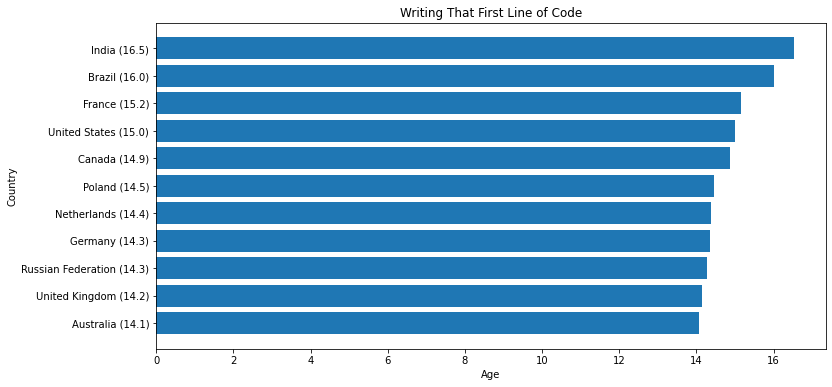

In [ ]:
tdata = data.groupby(by="Country").agg({
    "Age1stCode": np.mean,
})
countryAge1stCodeData = sorted(list(tdata["Age1stCode"].items()), key=lambda kv: kv[1])
countriesInterested = [
    "India",
    "Brazil",
    "France",
    "United States",
    "Canada",
    "Poland",
    "Germany",
    "Netherlands",
    "Russian Federation",
    "United Kingdom",
    "Australia",
]
tdata = []
for country, meanAge in countryAge1stCodeData:
    if country in countriesInterested:
        tdata.append((country, meanAge))
hCountPlot(
    tdata, 
    showValue=True, 
    roundValue=1, 
    title="Writing That First Line of Code",
    xlabel="Age",
    ylabel="Country"
)

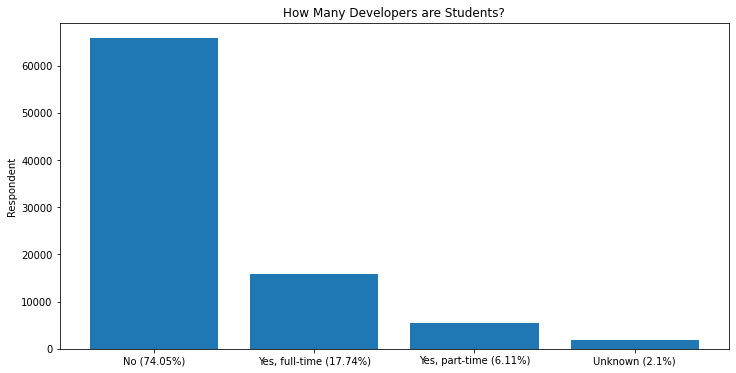

In [ ]:
# How Many Developers are Students?
tdata = data.Student.value_counts()
totalResponses = tdata.sum()
developerAsStudentData = list(tdata.items())
developerAsStudentData.append(("Unknown", totalEntries - totalResponses))
countPlot(developerAsStudentData, totalEntries, title="How Many Developers are Students?", ylabel="Respondent")

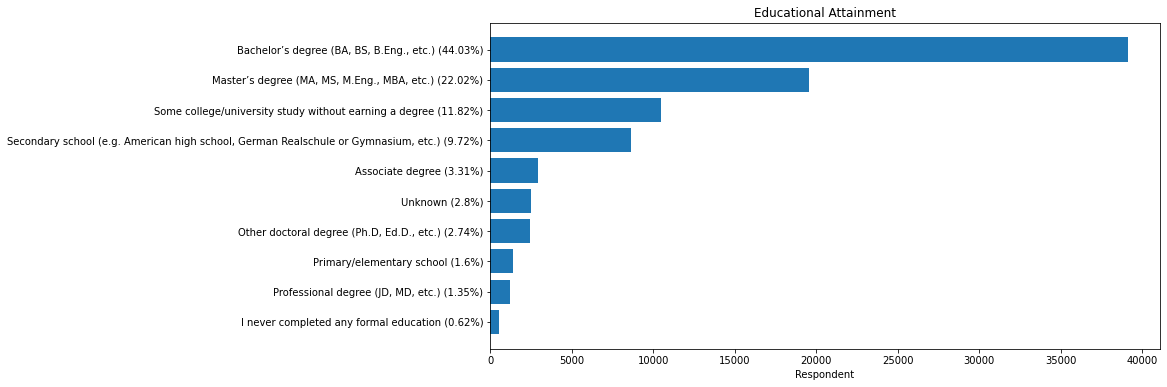

In [ ]:
tdata = data.groupby(by="EdLevel").agg({
    "Respondent": "count"
})
totalResponses = tdata["Respondent"].sum()
edLevelData = list(tdata["Respondent"].items())
edLevelData.append(("Unknown", totalEntries - totalResponses))
edLevelData = sorted(edLevelData, key=lambda kv: kv[1])
hCountPlot(edLevelData, total=totalEntries, title="Educational Attainment", xlabel="Respondent")

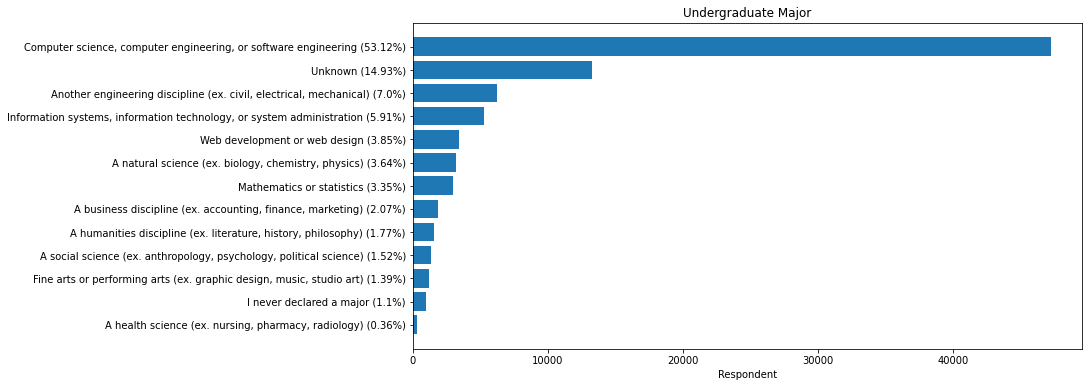

In [ ]:
tdata = data.UndergradMajor.value_counts()
totalResponses = tdata.sum()
underGradMajorData = list(tdata.items())
underGradMajorData.append(("Unknown", totalEntries - totalResponses))
underGradMajorData = sorted(underGradMajorData, key=lambda kv: kv[1])
hCountPlot(underGradMajorData, total=totalEntries, title="Undergraduate Major", xlabel="Respondent")

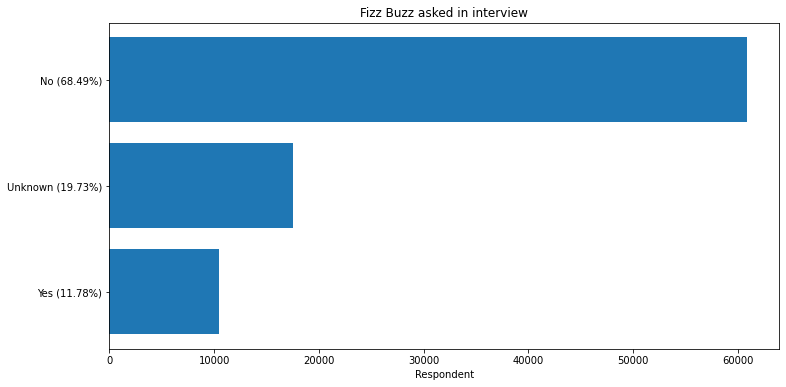

In [ ]:
# sns.lineplot(x=data.YearsCode.apply(parseStringToInt), y=data.ConvertedComp)
tdata = data.FizzBuzz.value_counts()
totalResponses = tdata.sum()
FizzBuzzData = list(tdata.items())
FizzBuzzData.append(("Unknown", totalEntries - totalResponses))
FizzBuzzData = sorted(FizzBuzzData, key=lambda kv: kv[1])
hCountPlot(FizzBuzzData, total=totalEntries, title="Fizz Buzz asked in interview", xlabel="Respondent")